# Enade2017 - Ciência da Computação - Brasil

In [1]:
# Biblioteca científica
import numpy as np
# Biblioteca para análise de dados
import pandas as pd
# Suprimindo os warnings da biblioteca pandas
pd.options.mode.chained_assignment = None
# Bibliotecas de visualização de dados
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as mtick
import missingno as msno
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Computação Brasil
ccc = pd.read_csv('dados/enade2017_computacao_brasil.csv', low_memory=False)
# Nome da IES em caixa alta
ccc.Instituicao = ccc.Instituicao.str.upper() 
# Exibindo o dataframe
ccc.head()

,NU_ANO,CO_IES,CO_CATEGAD,CO_ORGACAD,CO_GRUPO,CO_CURSO,CO_MODALIDADE,CO_MUNIC_CURSO,CO_UF_CURSO,CO_REGIAO_CURSO,...,QE_I77,QE_I78,QE_I79,QE_I80,QE_I81,NO_CURSO,Instituicao,Sigla,Municipio,UF
0,2017,1,1,10028,4004,36,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,CIÊNCIA DA COMPUTAÇÃO,UNIVERSIDADE FEDERAL DE MATO GROSSO (UFMT),UFMT,Cuiabá,MT
1,2017,1,1,10028,4004,36,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,CIÊNCIA DA COMPUTAÇÃO,UNIVERSIDADE FEDERAL DE MATO GROSSO (UFMT),UFMT,Cuiabá,MT
2,2017,1,1,10028,4004,36,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,CIÊNCIA DA COMPUTAÇÃO,UNIVERSIDADE FEDERAL DE MATO GROSSO (UFMT),UFMT,Cuiabá,MT
3,2017,1,1,10028,4004,36,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,CIÊNCIA DA COMPUTAÇÃO,UNIVERSIDADE FEDERAL DE MATO GROSSO (UFMT),UFMT,Cuiabá,MT
4,2017,1,1,10028,4004,36,1,5103403,51,5,...,NaN,NaN,NaN,NaN,NaN,CIÊNCIA DA COMPUTAÇÃO,UNIVERSIDADE FEDERAL DE MATO GROSSO (UFMT),UFMT,Cuiabá,MT


In [3]:
# Média geral de computação no Enade 2017 no Brasil
print(' Média Enade 2017 nas IES do Brasil: ', round(ccc.NT_GER.mean(),2))

 Média Enade 2017 nas IES do Brasil:  43.34


In [4]:
# As 20 maiores médias de computação no Enade 2017 nas IES do Brasil
media_ies_brasil = pd.DataFrame(ccc.groupby('Instituicao'
                        )['NT_GER'].mean()).reset_index().sort_values(by='NT_GER', ascending=False)
print('As 10 maiores médias de computação no Enade 2017 nas IES do Brasil\n')
media_ies_brasil.head(10)

As 10 maiores médias de computação no Enade 2017 nas IES do Brasil



,Instituicao,NT_GER
181,UNIVERSIDADE FEDERAL DE MINAS GERAIS (UFMG),60.533333
153,UNIVERSIDADE ESTADUAL DE CAMPINAS (UNICAMP),60.082222
204,UNIVERSIDADE FEDERAL DO RIO GRANDE DO SUL (UFRGS),58.666667
232,UNIVERSIDADE VILA VELHA (UVV),57.911111
203,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE (U...,57.496667
184,UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),57.030088
177,UNIVERSIDADE FEDERAL DE JUIZ DE FORA (UFJF),56.661364
195,UNIVERSIDADE FEDERAL DO CEARÁ (UFC),56.564815
191,UNIVERSIDADE FEDERAL DE SÃO PAULO (UNIFESP),56.086842
199,UNIVERSIDADE FEDERAL DO PARANÁ (UFPR),55.112308


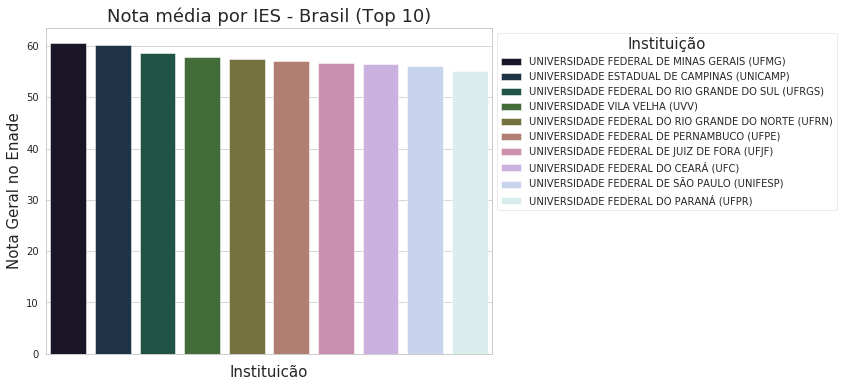

In [5]:
# Nota média por IES
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot('Instituicao', 'NT_GER', data=media_ies_brasil.head(10), hue='Instituicao', 
                 dodge=False, palette='cubehelix')

ax.set_title('Nota média por IES - Brasil (Top 10)', fontsize=18)

ax.set_xlabel('Instituicão', fontsize=15)

ax.set(xticklabels=[])

ax.set_ylabel('Nota Geral no Enade', fontsize=15)

plt.legend(title='Instituição', bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_title(), fontsize='15') 

plt.show()

In [6]:
# As médias de computação no Enade 2017 nas IES do Nordeste
uf_nordeste = ['MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'BA']
print(' Média Enade 2017 nas IES do nordeste: ', round(ccc[ccc.UF.isin(uf_nordeste)]['NT_GER'].mean(),2))

 Média Enade 2017 nas IES do nordeste:  44.36


In [7]:
# As médias de computação no Enade 2017 nas IES do Nordeste
media_ies_ne = pd.DataFrame(ccc.groupby(ccc[ccc.UF.isin(uf_nordeste)]['Instituicao']
                        )['NT_GER'].mean()).reset_index().sort_values(by='NT_GER', ascending=False)
print('As médias de computação no Enade 2017 nas IES do Nordeste')
media_ies_ne.head(20)

As médias de computação no Enade 2017 nas IES do Nordeste


,Instituicao,NT_GER
38,UNIVERSIDADE FEDERAL DO RIO GRANDE DO NORTE (U...,57.496667
33,UNIVERSIDADE FEDERAL DE PERNAMBUCO (UFPE),57.030088
35,UNIVERSIDADE FEDERAL DO CEARÁ (UFC),56.564815
32,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),54.243284
40,UNIVERSIDADE FEDERAL RURAL DO SEMI-ÁRIDO (UFERSA),49.100000
30,UNIVERSIDADE FEDERAL DA PARAÍBA (UFPB),49.047917
39,UNIVERSIDADE FEDERAL RURAL DE PERNAMBUCO (UFRPE),48.657576
17,"INSTITUTO FEDERAL DE EDUCAÇÃO, CIÊNCIA E TECNO...",48.136364
27,UNIVERSIDADE ESTADUAL DO SUDOESTE DA BAHIA (UESB),48.100000
34,UNIVERSIDADE FEDERAL DE SERGIPE (UFS),47.548387


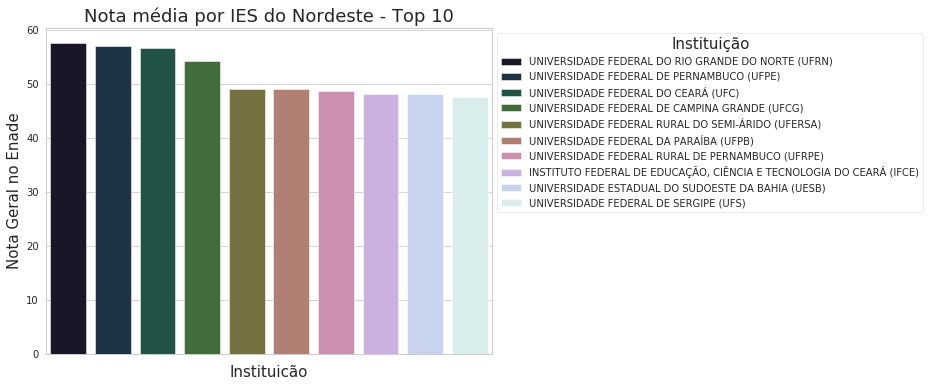

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

ax = sns.barplot('Instituicao', 'NT_GER', data=media_ies_ne.head(10), hue='Instituicao', 
                 dodge=False, palette='cubehelix')

ax.set_title('Nota média por IES do Nordeste - Top 10', fontsize=18)

ax.set_xlabel('Instituicão', fontsize=15)

ax.set(xticklabels=[])

ax.set_ylabel('Nota Geral no Enade', fontsize=15)

plt.legend(title='Instituição', bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_title(), fontsize='15') 

plt.show()

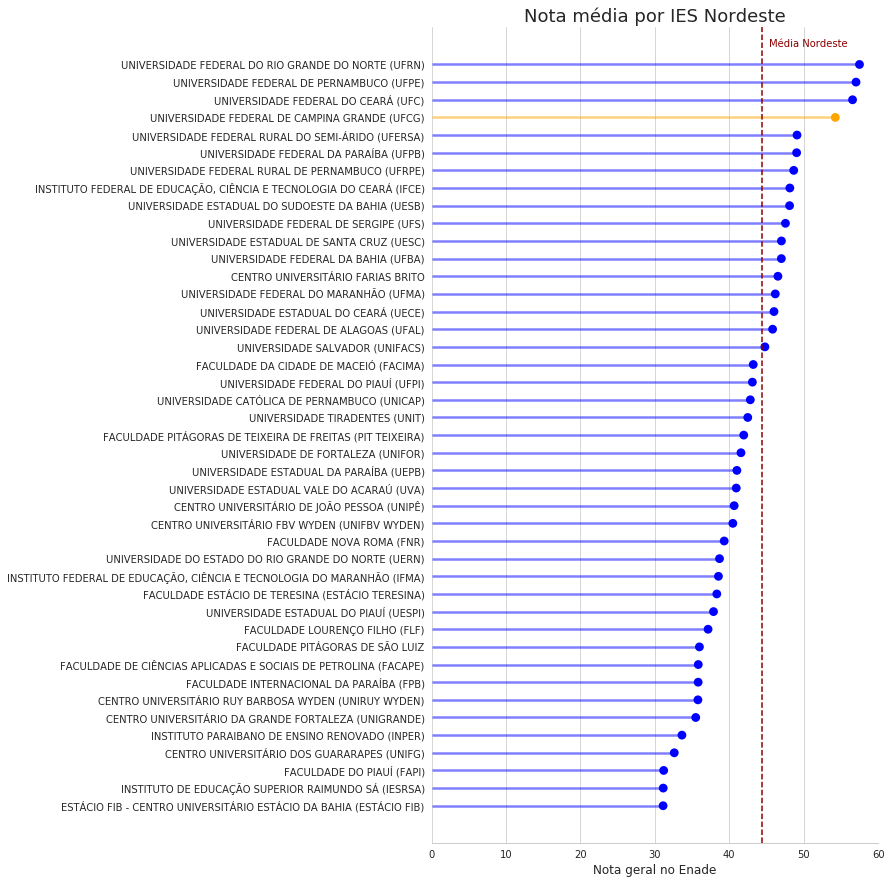

In [9]:
# Inicializando a figura
fig, ax = plt.subplots(figsize=(8, 15))

# Criar cor para destacar a UFCG
destacar=np.where(media_ies_ne['Instituicao']=='UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG)', 'orange', 'blue')

# Plotando o gráfico
#sns.set_color_codes("muted")
ax = sns.pointplot(x="NT_GER", y="Instituicao", data=media_ies_ne, join=False, palette=destacar)
plt.hlines(y=media_ies_ne.Instituicao, xmin=0, xmax=media_ies_ne.NT_GER, alpha=0.5, linewidth=2.5, 
           color=destacar)

# Barra com a média
ax.axvline(round(ccc[ccc.UF.isin(uf_nordeste)]['NT_GER'].mean(),2), ls='--', color='darkred')
ax.text(x=round(ccc[ccc.UF.isin(uf_nordeste)]['NT_GER'].mean(),2)+1, y=-1, s='Média Nordeste', color='darkred')

# Título e axes
ax.set_title('Nota média por IES Nordeste', fontsize=18)
ax.set(xlim=(0, 60), ylabel='',
       xlabel='Nota geral no Enade')
sns.despine(left=True)

In [10]:
# As médias de computação no Enade 2017 nas IES da Paríba
print(' Média Enade 2017 nas IES do nordeste: ', round(ccc[ccc.UF=='PB']['NT_GER'].mean(),2))

 Média Enade 2017 nas IES do nordeste:  46.4


In [11]:
# As médias de computação no Enade 2017 nas IES da Paraíba
media_ies_pb = pd.DataFrame(ccc.groupby(ccc[ccc.UF=='PB']['Instituicao']
                        )['NT_GER'].mean()).reset_index().sort_values(by='NT_GER', ascending=False)
print('As médias de computação no Enade 2017 nas IES da Paraíba')
media_ies_pb

As médias de computação no Enade 2017 nas IES da Paraíba


,Instituicao,NT_GER
5,UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG),54.243284
4,UNIVERSIDADE FEDERAL DA PARAÍBA (UFPB),49.047917
3,UNIVERSIDADE ESTADUAL DA PARAÍBA (UEPB),41.017857
0,CENTRO UNIVERSITÁRIO DE JOÃO PESSOA (UNIPÊ),40.652830
1,FACULDADE INTERNACIONAL DA PARAÍBA (FPB),35.813333
2,INSTITUTO PARAIBANO DE ENSINO RENOVADO (INPER),33.633333


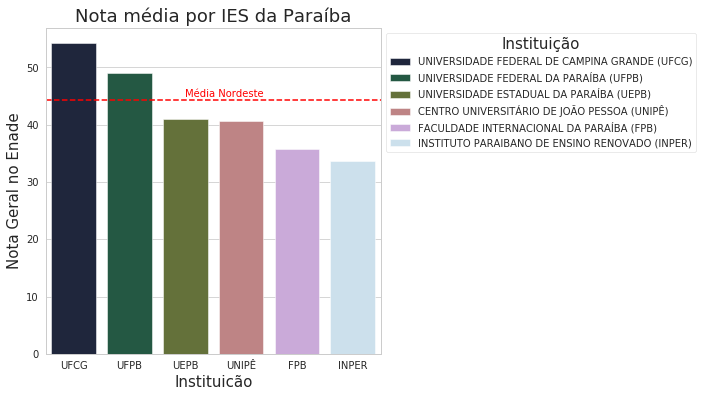

In [12]:
# Definindo o tamanho da figura
fig, ax = plt.subplots(figsize=(6,6))

#Gerando a figura
ax = sns.barplot('Instituicao', 'NT_GER', data=media_ies_pb, hue='Instituicao', 
                 dodge=False, palette='cubehelix')

# Barra com a média
ax.axhline(round(ccc[ccc.UF.isin(uf_nordeste)]['NT_GER'].mean(),2), ls='--', color='red')
ax.text(y=round(ccc[ccc.UF.isin(uf_nordeste)]['NT_GER'].mean(),2)+.5, x=2, s='Média Nordeste', color='red')

# Definindo o título da figura
ax.set_title('Nota média por IES da Paraíba', fontsize=18)

# Definindo o nome do eixo horizontal
ax.set_xlabel('Instituicão', fontsize=15)

# Definindo o nome das barras
ax.set(xticklabels=['UFCG', 'UFPB', 'UEPB', 'UNIPÊ', 'FPB', 'INPER'])

# Definindo o nome do eixo vertical
ax.set_ylabel('Nota Geral no Enade', fontsize=15)

plt.legend(title='Instituição', bbox_to_anchor=(1, 1))
plt.setp(ax.get_legend().get_title(), fontsize='15') 

plt.show()

In [13]:
# Criar dataframe para plotar o gráfico da nota geral mínima e máxima de cada IES
max_ies_ne = pd.DataFrame(ccc.groupby(ccc[ccc.UF.isin(uf_nordeste)]['Instituicao']
                        )['NT_GER'].max()).reset_index()
min_ies_ne = pd.DataFrame(ccc.groupby(ccc[ccc.UF.isin(uf_nordeste)]['Instituicao']
                        )['NT_GER'].min()).reset_index()

min_max_ies_ne = pd.merge(min_ies_ne, max_ies_ne,  on='Instituicao')
min_max_ies_ne.columns = ['Instituicao', 'NT_GER_MIN', 'NT_GER_MAX']
min_max_ies_ne = min_max_ies_ne.sort_values(by='NT_GER_MAX', ascending=False)

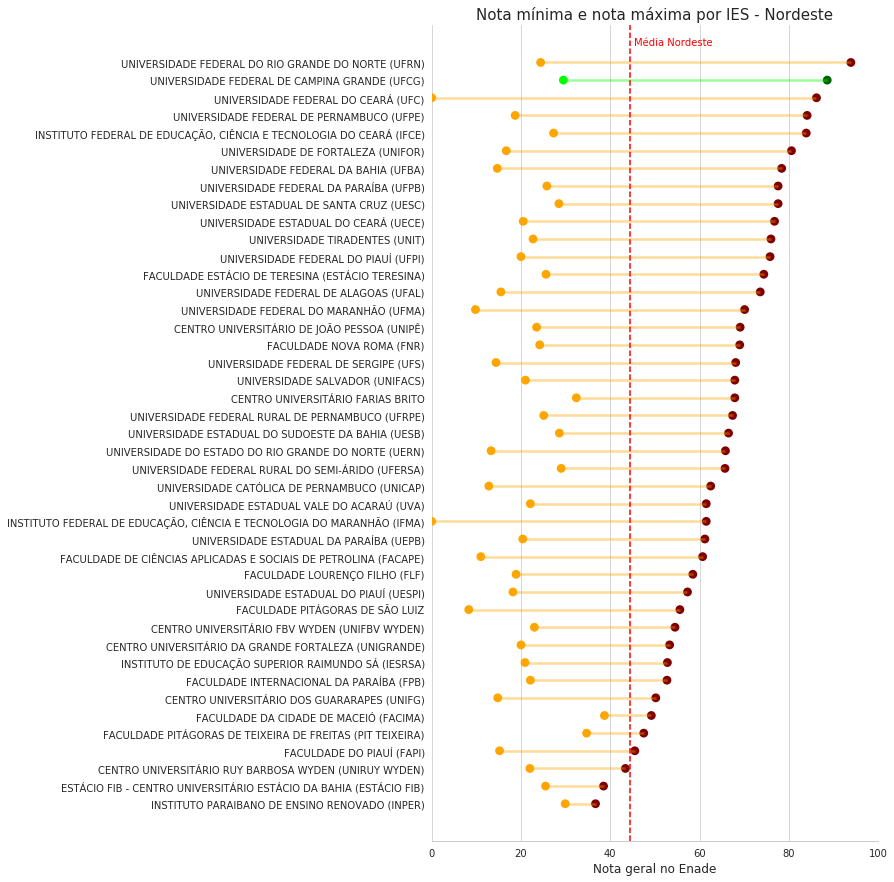

In [14]:
# Inicializando a figura
fig, ax = plt.subplots(figsize=(8, 15))

# Criar cor para destacar a UFCG
destacar_min=np.where(min_max_ies_ne['Instituicao']=='UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG)', 
                      'lime', 'orange')
destacar_max=np.where(min_max_ies_ne['Instituicao']=='UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG)', 
                      'darkgreen', 'maroon')
destacar_line=np.where(min_max_ies_ne['Instituicao']=='UNIVERSIDADE FEDERAL DE CAMPINA GRANDE (UFCG)', 
                      'lime', 'orange')

# Plotando o gráfico
sns.set_color_codes("muted")
ax = sns.pointplot(x="NT_GER_MIN", y="Instituicao", data=min_max_ies_ne, join=False, palette=destacar_min)
ax = sns.pointplot(x="NT_GER_MAX", y="Instituicao", data=min_max_ies_ne, join=False, palette=destacar_max)
plt.hlines(y=min_max_ies_ne.Instituicao, xmin=min_max_ies_ne.NT_GER_MIN, xmax=min_max_ies_ne.NT_GER_MAX, alpha=0.4,
           linewidth=2.5, color=destacar_line)

# Barra com a média
ax.axvline(round(ccc[ccc.UF.isin(uf_nordeste)]['NT_GER'].mean(),2), ls='--', color='red')
ax.text(x=round(ccc[ccc.UF.isin(uf_nordeste)]['NT_GER'].mean(),2)+1, y=-1, s='Média Nordeste', color='red')

# Título e axes
ax.set_title('Nota mínima e nota máxima por IES - Nordeste', fontsize=15)
ax.set(xlim=(0, 100), ylabel='',
       xlabel='Nota geral no Enade')
sns.despine(left=True)
plt.show()